Loading dataset...
done in 0.012s.
Extracting tf features for LDA...
done in 0.016s.
CountVectorizer(max_df=0.95, max_features=10000, min_df=2)


 Fitting LDA models with tf features, n_samples=20000 and n_features=10000...
done in 1.443s.


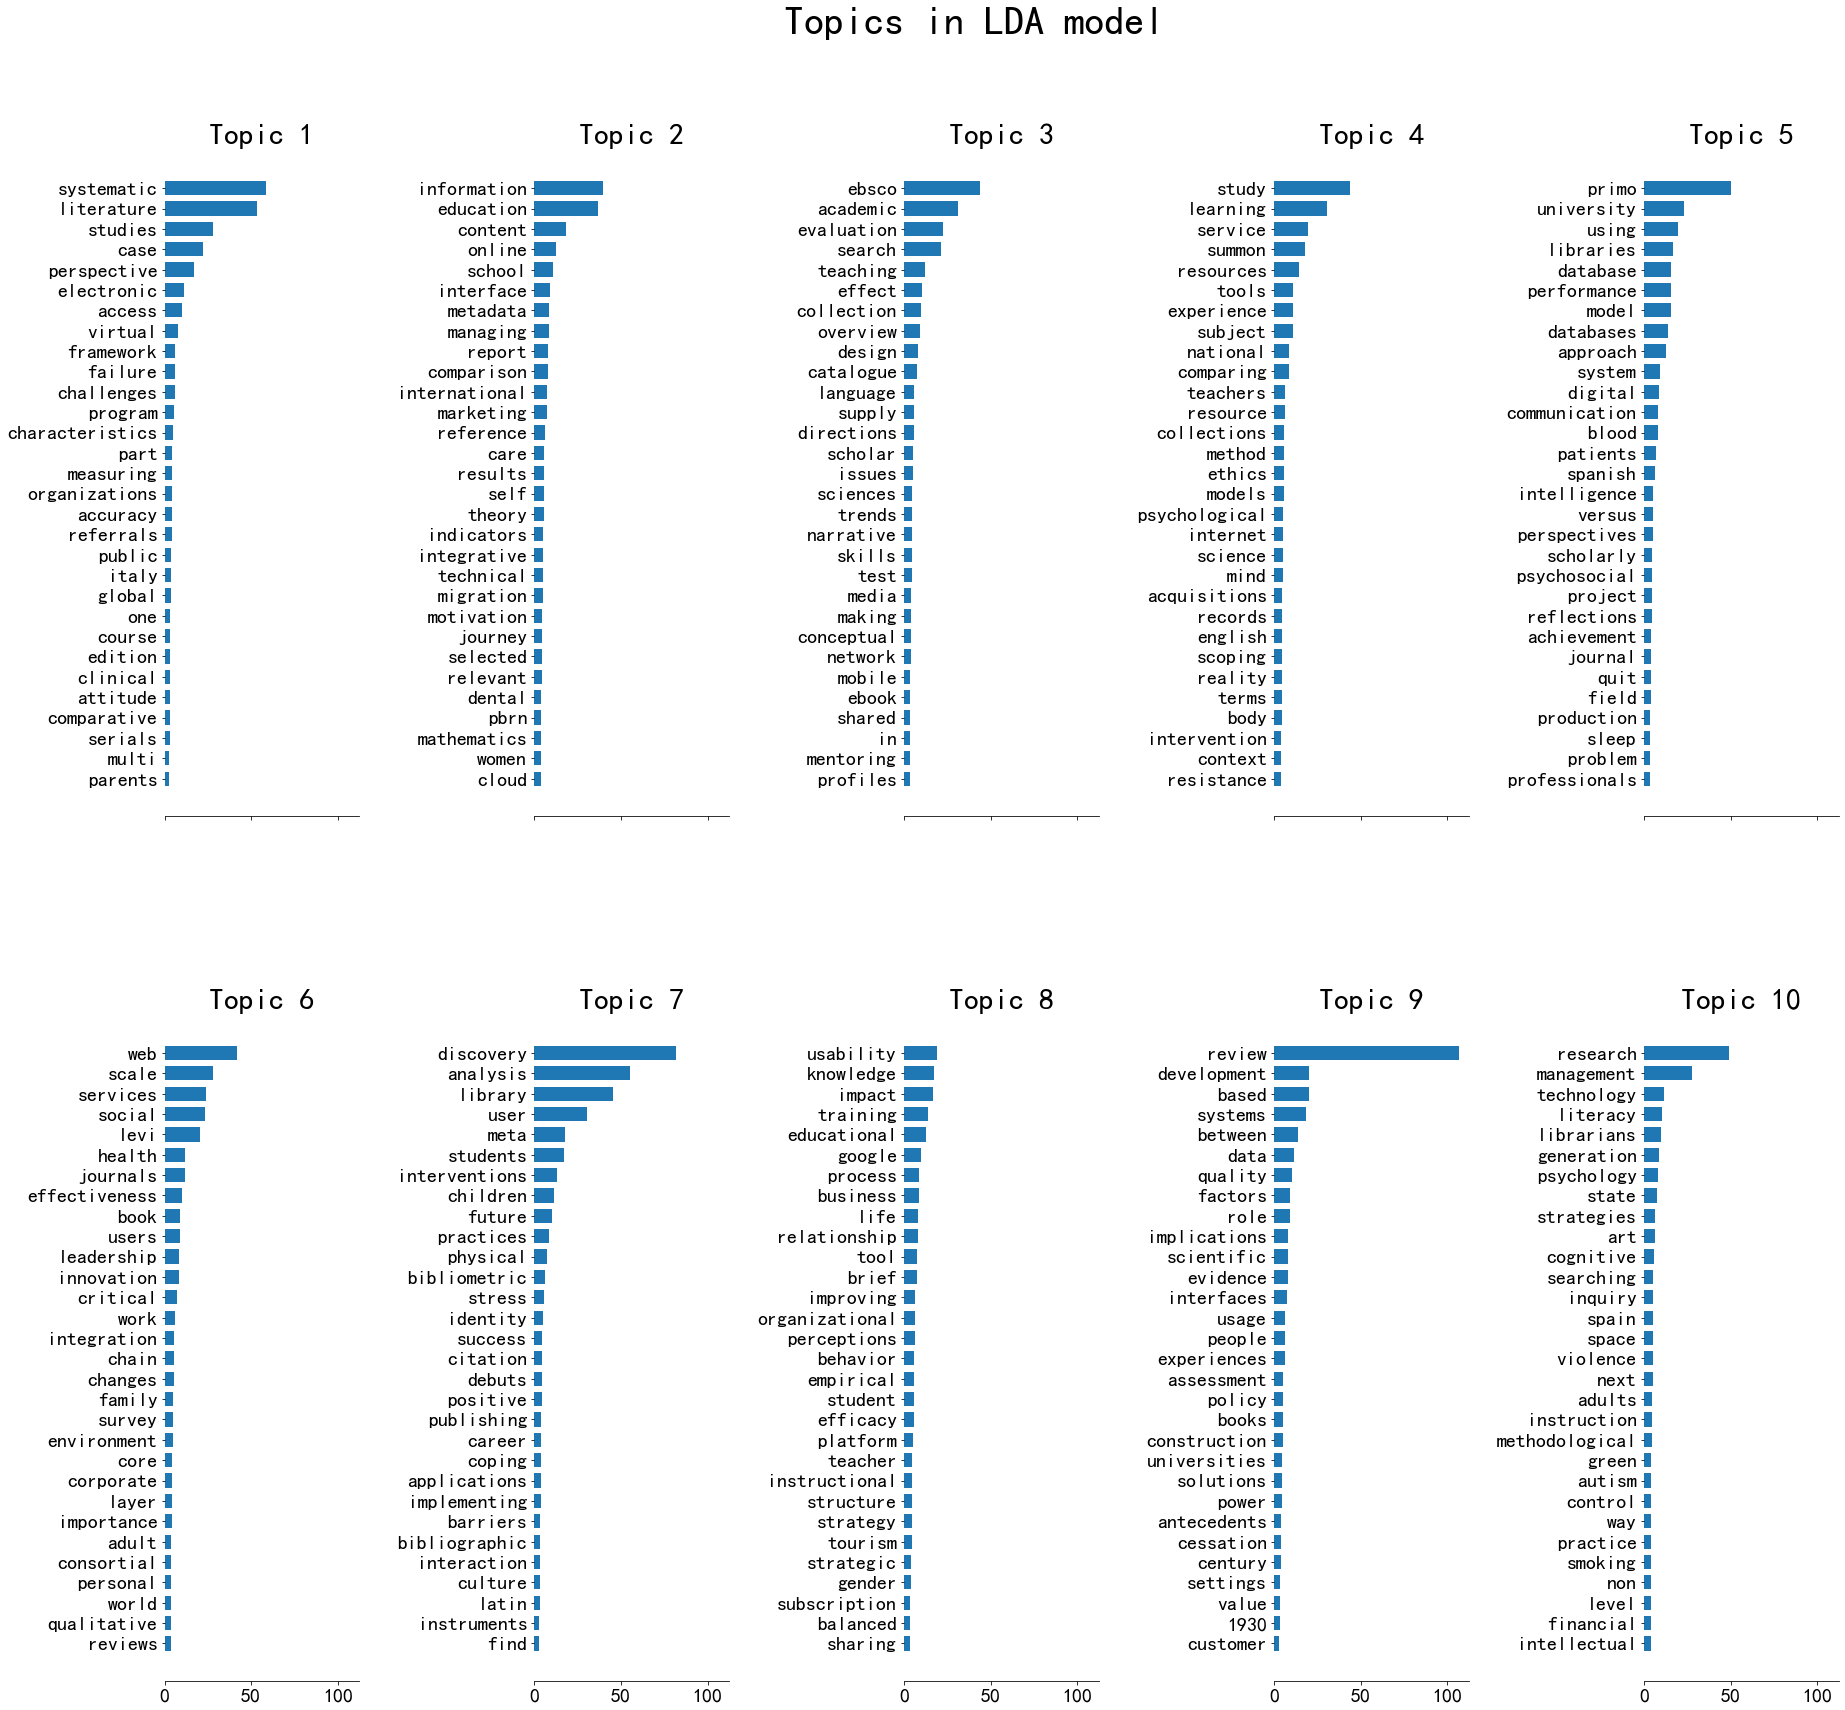

In [16]:
from __future__ import print_function
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import pylab as mpl

##############################################

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        mpl.rcParams['font.sans-serif'] = ['SimHei'] 
        mpl.rcParams['axes.unicode_minus'] = False 
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.savefig('testplot/Topics_in_LDA_model.tif')
    
##############################################

print("Loading dataset...")
t0 = time()
data=[]

f=open("savedrecs.txt","r",encoding='utf-8')
stopwords = [word.strip() for word in open('stopwords.txt','r').readlines()]

f.readline()
for line in f:
    #print (line.startswith('AB'))
    if line.startswith('TI') == True :
        if len(line.lstrip('TI').strip())>0:
            data.append(line.lstrip('TI').strip())
print("done in %0.3fs." % (time() - t0))

data_ = [[word for word in doc.lower().split() if word not in stopwords] for doc in data]
data_samples=[b for a in data_ for b in a]
##############################################


##############################################

n_samples = 20000
n_features = 10000
n_components = 10   # n-topics
n_top_words = 30     # key-words
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=n_features)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print(tf_vectorizer)


print('\n' * 2, "Fitting LDA models with tf features, ""n_samples=%d and n_features=%d..."% (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,learning_method='online',learning_offset=50.,random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

##############################################

In [17]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer )

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.366134  0.031199       1        1  10.630864
8      0.074586  0.350685       2        1  10.454498
4      0.043498 -0.081019       3        1  10.290476
5      0.042408 -0.062161       4        1  10.123810
3      0.036936 -0.047838       5        1  10.084127
2      0.031940 -0.034352       6        1   9.868078
1      0.033145 -0.035166       7        1   9.797532
0      0.045303 -0.062218       8        1   9.665214
9      0.029389 -0.030538       9        1   9.581481
7      0.028928 -0.028592      10        1   9.503922, topic_info=             Term       Freq      Total Category  logprob  loglift
575        review  91.000000  91.000000  Default  30.0000  30.0000
208     discovery  67.000000  67.000000  Default  29.0000  29.0000
663    systematic  52.000000  52.000000  Default  28.0000  28.0000
391    literature  48.000000  48.000000  Default  27.0000  27.0000
38       analysis  46.000000  46.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
635     strategic   3.525320   4.284205  Topic10  -4.6240   2.1585
286        gender   3.229199   3.987641  Topic10  -4.7118   2.1425
650  subscription   2.984323   3.743837  Topic10  -4.7906   2.1267
69       balanced   2.941431   3.700708  Topic10  -4.8051   2.1238
609       sharing   2.928108   3.687184  Topic10  -4.8097   2.1230

[330 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2         2  0.881000         1930
13        6  0.986304     academic
14        8  0.918048       access
16        8  0.909251     accuracy
17        3  0.740032  achievement
...     ...       ...          ...
723       9  0.937127          way
724       4  0.970493          web
730       7  0.757739        women
731       4  0.877841         work
734       4  0.777629        world

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 5, 6, 4, 3, 2, 1, 10, 8])